In [1]:
#二手车价格预测--特征工程
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfCar = pd.read_csv("data//ready_car_train.csv")
dfCar.head()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
dfCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 30 columns):
Unnamed: 0           149999 non-null int64
SaleID               149999 non-null int64
name                 149999 non-null int64
regDate              149999 non-null int64
model                149999 non-null float64
brand                149999 non-null int64
bodyType             149999 non-null float64
fuelType             149999 non-null float64
gearbox              149999 non-null float64
power                149999 non-null int64
kilometer            149999 non-null float64
notRepairedDamage    149999 non-null float64
regionCode           149999 non-null int64
creatDate            149999 non-null int64
price                149999 non-null float64
v_0                  149999 non-null float64
v_1                  149999 non-null float64
v_2                  149999 non-null float64
v_3                  149999 non-null float64
v_4                  149999 non-null float64
v_5  

In [4]:
#把分类数据转为one-hot编码
#先看下bodyType车身类型
dfCar['bodyType'].value_counts()

0.0    42745
1.0    36336
2.0    31277
3.0    13903
4.0     9900
5.0     7833
6.0     6680
7.0     1325
Name: bodyType, dtype: int64

In [5]:
#有8种类型，
#转ONE-HOT函数
def getOneHotFn(data,nType):#当前值,传入类型数,#注意pandas要apply的列值，必须在第一参
    
    m = np.zeros([int(nType),])#全0矩阵 一维有多少类就多少列
    #print(m)
    #有值的列置为1
    m[int(data)] = 1
    return m

#getOneHotFn(2,8)#array([0., 0., 1., 0., 0., 0., 0.,0.])
#getOneHotFn(7,8)#array([0., 0., 0., 0., 0., 0., 0., 1.])

In [6]:
dfCar['bodyType_new'] =dfCar['bodyType'].apply(getOneHotFn,args=(8,))#apply里面是函数的多参传递
#dfCar.head()

In [7]:
#fuelType转one-hot
dfCar['fuelType'].value_counts()

0.0    97289
1.0    49856
2.0     2362
3.0      283
4.0      125
5.0       47
6.0       37
Name: fuelType, dtype: int64

In [8]:
dfCar['fuelType_new'] = dfCar['fuelType'].apply(getOneHotFn,args=(7,))
dfCar.tail()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new
149994,149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,...,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149995,149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,...,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149996,149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,...,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149997,149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,...,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149998,149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,...,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
#二分类的几列不用改用0，1即可

In [9]:
#日期型数据查看，regDate汽车注册日期、creatDate
print(dfCar['regDate'][0])#20040402
print(type(dfCar['regDate'][0]))#numpy.int64
#需转成
print(dfCar['creatDate'][0])
print(type(dfCar['creatDate'][0]))

20040402
<class 'numpy.int64'>
20160404
<class 'numpy.int64'>


In [10]:
#日期处理函数
def dateFn(data):
    yearStr = str(data)[:4]#只要年，月影响不大
    d = pd.to_datetime(yearStr,format='%Y.%m.%d')
    #d = np.datetime64(yearStr)#或用np.datetime64
    return d
print(type(dateFn(20040402)))
print(dateFn(20040402))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2004-01-01 00:00:00


In [11]:
dfCar['regDate_new'] = dfCar['regDate'].apply(dateFn)
dfCar['creatDate_new'] = dfCar['creatDate'].apply(dateFn)
dfCar.head()


,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_9,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new,regDate_new,creatDate_new
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2004-01-01,2016-01-01
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2003-01-01,2016-01-01
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2004-01-01,2016-01-01
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1996-01-01,2016-01-01
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2012-01-01,2016-01-01


In [12]:
dfCar['creatDate_new'].value_counts()#去掉月份后，查看上线时间，只有两个，15，15年，且数据偏斜严重，此项没有泛化规率用于预测，不采用

2016-01-01    149981
2015-01-01        18
Name: creatDate_new, dtype: int64

In [13]:
del dfCar['creatDate_new']
del dfCar['creatDate']

In [14]:
dfCar['regDate_new'].value_counts()#不同年份买的注册的车是价格预测的重要指标

2000-01-01    10572
1999-01-01    10063
2005-01-01     9994
2006-01-01     9242
2001-01-01     9110
2003-01-01     9059
2004-01-01     8889
2002-01-01     8746
2007-01-01     8080
1998-01-01     7907
2008-01-01     7458
2009-01-01     7277
1997-01-01     6559
2010-01-01     5739
2011-01-01     5503
1996-01-01     4822
2012-01-01     4258
1995-01-01     4117
2013-01-01     2789
2014-01-01     2240
1994-01-01     2158
1993-01-01     1476
2015-01-01     1387
1992-01-01     1339
1991-01-01     1215
Name: regDate_new, dtype: int64

In [15]:
#查看其它特征
dfCar['name'].value_counts()
#名称或许有用，但类别数据类别19万多个，易有噪声，
#且名称与商标重复特征。
#不选此特征

708       282
387       282
55        280
1541      263
203       233
         ... 
7123        1
11221       1
13270       1
15319       1
184730      1
Name: name, Length: 99661, dtype: int64

In [16]:
dfCar['name'].sort_values().unique()

array([     0,      3,      4, ..., 196810, 196811, 196812], dtype=int64)

(array([49015., 17281., 13390., 11506., 10758., 10176.,  9766.,  9602.,
         9348.,  9157.]),
 array([     0. ,  19681.2,  39362.4,  59043.6,  78724.8,  98406. ,
        118087.2, 137768.4, 157449.6, 177130.8, 196812. ]),
 <a list of 10 Patch objects>)

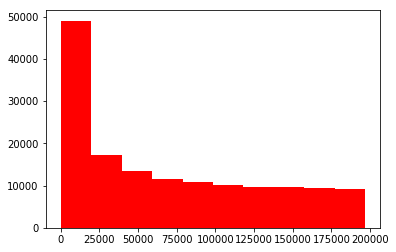

In [17]:
plt.hist(dfCar['name'],orientation='vertical',histtype='bar',color='red')

In [18]:
dfCar['model'].value_counts()
#车型编号 由品牌代号，车型等信息组成，等于是一个重复数据，且组合起来容易有噪声，
#且是类别型数据，类别太多。
#看训练效果，加入去掉比对下

0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64

In [21]:
#看下相关性
corrV = dfCar.corr()#相关系数函数.corr()
print(corrV)

                   Unnamed: 0    SaleID      name   regDate     model  \
Unnamed: 0           1.000000  1.000000 -0.002291 -0.001361  0.000659   
SaleID               1.000000  1.000000 -0.002291 -0.001361  0.000659   
name                -0.002291 -0.002291  1.000000 -0.037658  0.016080   
regDate             -0.001361 -0.001361 -0.037658  1.000000  0.148780   
model                0.000659  0.000659  0.016080  0.148780  1.000000   
brand               -0.001734 -0.001734  0.040648  0.033148  0.358765   
bodyType            -0.004407 -0.004407  0.033418  0.100641  0.200231   
fuelType            -0.001989 -0.001989  0.013132  0.259541  0.047106   
gearbox              0.001701  0.001701  0.025810  0.136994  0.018592   
power                0.000875  0.000875  0.000233  0.097442  0.031245   
kilometer           -0.001130 -0.001130 -0.007589 -0.492833 -0.087445   
notRepairedDamage   -0.002923 -0.002923  0.028717 -0.150310 -0.017776   
regionCode          -0.001082 -0.001082  0.005608 -

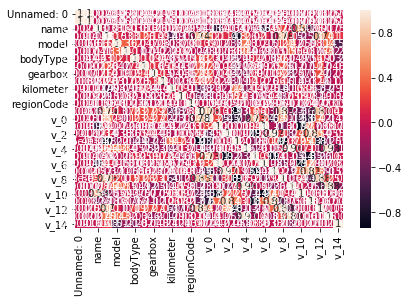

In [27]:
sns.heatmap(corrV,annot=True)#画热力图看下，……也没看出个所以然来，太密了[捂脸]

In [28]:
dfCar['model'].sort_values().unique()#

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [29]:
print(dfCar['model'].sort_values().unique().shape)

(248,)


(array([64352., 38406., 16076.,  8836.,  8715.,  3782.,  4622.,  2963.,
         1757.,   490.]),
 array([  0. ,  24.7,  49.4,  74.1,  98.8, 123.5, 148.2, 172.9, 197.6,
        222.3, 247. ]),
 <a list of 10 Patch objects>)

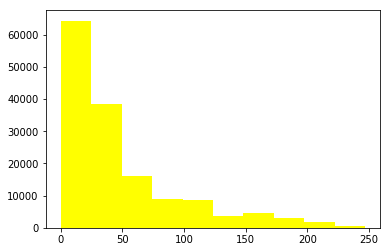

In [30]:
plt.hist(dfCar['model'],orientation='vertical',histtype='bar',color='yellow')

In [31]:
dfCar['brand'].value_counts()

0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      332
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64

(array([48056., 33980., 26577., 22473.,  4840.,  4054.,  5855.,  2313.,
         1217.,   634.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

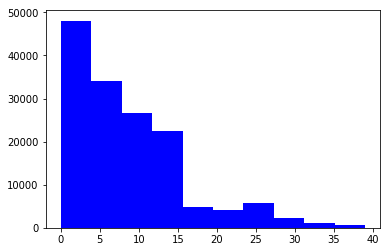

In [32]:
plt.hist(dfCar['brand'],orientation='vertical',histtype='bar',color='blue')

In [33]:
dfCar['brand'].sort_values().unique()#排序看维一，可见是类别数据

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [34]:
#转one-hot
dfCar['brand_new'] = dfCar['brand'].apply(getOneHotFn,args=(40,))
dfCar.head()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_9,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new,regDate_new,brand_new
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2004-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2003-01-01,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2004-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1996-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2012-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


In [35]:
#发动机功率
dfCar['power'].value_counts()

0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64

In [36]:
print(dfCar['power'].sort_values().unique())
print(dfCar['power'].sort_values().unique().shape)
#数值型or类别型？

[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    23    24    25
    26    29    30    31    32    33    34    35    36    37    38    39
    40    41    42    43    44    45    46    47    48    49    50    51
    52    53    54    55    56    57    58    59    60    61    62    63
    64    65    66    67    68    69    70    71    72    73    74    75
    76    77    78    79    80    81    82    83    84    85    86    87
    88    89    90    91    92    93    94    95    96    97    98    99
   100   101   102   103   104   105   106   107   108   109   110   111
   112   113   114   115   116   117   118   119   120   121   122   123
   124   125   126   127   128   129   130   131   132   133   134   135
   136   137   138   139   140   141   142   143   144   145   146   147
   148   149   150   151   152   153   154   155   156   157   158   159
   160   161   162   163   164   165   166   167   

(array([48056., 33980., 26577., 22473.,  4840.,  4054.,  5855.,  2313.,
         1217.,   634.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

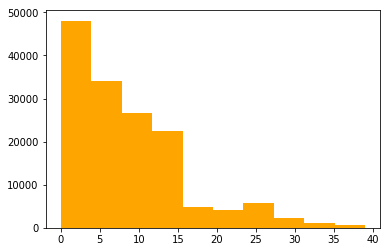

In [37]:
plt.hist(dfCar['brand'],orientation='vertical',histtype='bar',color='orange')

In [38]:
#做一个类别与索引编号对应的字典
powerMatrixOrder = dfCar['power'].sort_values().unique()
powerDict = {v:np.argwhere(powerMatrixOrder==v)[0][0] for v in powerMatrixOrder}
#取矩阵某元素的行列号索引，np.argwhere(矩阵 == 某元素值)
print(powerDict)
print(len(powerDict))
#{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5,…… 17932: 564, 19312: 565
#564

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 23: 21, 24: 22, 25: 23, 26: 24, 29: 25, 30: 26, 31: 27, 32: 28, 33: 29, 34: 30, 35: 31, 36: 32, 37: 33, 38: 34, 39: 35, 40: 36, 41: 37, 42: 38, 43: 39, 44: 40, 45: 41, 46: 42, 47: 43, 48: 44, 49: 45, 50: 46, 51: 47, 52: 48, 53: 49, 54: 50, 55: 51, 56: 52, 57: 53, 58: 54, 59: 55, 60: 56, 61: 57, 62: 58, 63: 59, 64: 60, 65: 61, 66: 62, 67: 63, 68: 64, 69: 65, 70: 66, 71: 67, 72: 68, 73: 69, 74: 70, 75: 71, 76: 72, 77: 73, 78: 74, 79: 75, 80: 76, 81: 77, 82: 78, 83: 79, 84: 80, 85: 81, 86: 82, 87: 83, 88: 84, 89: 85, 90: 86, 91: 87, 92: 88, 93: 89, 94: 90, 95: 91, 96: 92, 97: 93, 98: 94, 99: 95, 100: 96, 101: 97, 102: 98, 103: 99, 104: 100, 105: 101, 106: 102, 107: 103, 108: 104, 109: 105, 110: 106, 111: 107, 112: 108, 113: 109, 114: 110, 115: 111, 116: 112, 117: 113, 118: 114, 119: 115, 120: 116, 121: 117, 122: 118, 123: 119, 124: 120, 125: 

In [39]:
powerDict[17932]

564

In [40]:
#注意，发动机功率也是类别型数据，长度566，里面分类标号并不是按顺序来看。变OneHot不能传入data，要用data的编号，
#目的是不增加不必要的向量维度。测试数据也照做
#所以函数改下，对应值下标位置置1
def getOneHotFn_power(data,nType):#当前值,传入类型数,#注意pandas要apply的列值，必须在第一参
    
    m = np.zeros([int(nType),])#全0矩阵 一维有多少类就多少列
    #print(m)
    #有值的列置为1
    m[powerDict[int(data)]] = 1
    return m
getOneHotFn_power(17932,566)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:


dfCar['power_new'] = dfCar['power'].apply(getOneHotFn_power,args=(566,))
dfCar.head()


,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new,regDate_new,brand_new,power_new
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,-2.881803,2.804097,-2.420821,0.795292,0.914763,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2004-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,-4.900482,2.096338,-1.030483,-1.722674,0.245522,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2003-01-01,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,-4.846749,1.803559,1.565330,-0.832687,-0.229963,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2004-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1996-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,-1.896240,0.910783,0.931110,2.834518,1.923482,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2012-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [42]:
dfCar['kilometer'].value_counts()#数值型

15.0    96877
12.5    15722
10.0     6459
9.0      5257
8.0      4573
7.0      4084
6.0      3725
5.0      3144
4.0      2718
3.0      2501
2.0      2353
0.5      1840
1.0       746
Name: kilometer, dtype: int64

(array([ 2586.,  4854.,  2718.,  6869.,  4084.,  9830.,  6459.,     0.,
        15722., 96877.]),
 array([ 0.5 ,  1.95,  3.4 ,  4.85,  6.3 ,  7.75,  9.2 , 10.65, 12.1 ,
        13.55, 15.  ]),
 <a list of 10 Patch objects>)

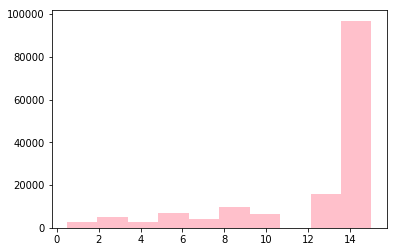

In [43]:
plt.hist(dfCar['kilometer'],orientation='vertical',histtype='bar',color='pink')

In [ ]:
#数值总共从15到19差距不大np.log()后变化不大，看横轴跨度和纵轴变化。而价格未做归一化前，本来是从0-100000，特别偏斜，所以要做归一化。

(array([  1840.,      0.,    746.,      0.,   2353.,   2501.,   5862.,
          7809.,  16289., 112599.]),
 array([-0.69314718, -0.35302744, -0.0129077 ,  0.32721203,  0.66733177,
         1.00745151,  1.34757125,  1.68769099,  2.02781072,  2.36793046,
         2.7080502 ]),
 <a list of 10 Patch objects>)

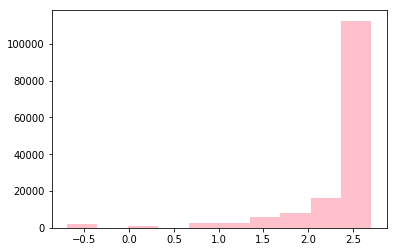

In [44]:
#但数据型还是统一做归一化，使训练加速收敛
dfCar['kilometer_new'] = dfCar['kilometer'].apply(lambda x : np.log(x))
plt.hist(dfCar['kilometer_new'],orientation='vertical',histtype='bar',color='pink')

In [45]:
dfCar['regionCode'].value_counts()

419     369
764     258
125     137
176     136
462     134
       ... 
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64

In [46]:
dfCar['regionCode'].sort_values().unique()
dfCar['regionCode'].sort_values().unique().shape

(7905,)

In [ ]:
#地区编码分类型，太多类别，对价格没太大影响，不要

In [47]:
dfCar['price'].value_counts()

6.214608    2337
7.313220    2158
7.090077    1922
6.907755    1850
7.824046    1821
            ... 
8.776321       1
9.845858       1
9.247540       1
9.499197       1
5.648974       1
Name: price, Length: 3763, dtype: int64

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   908.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <a list of 10 Patch objects>)

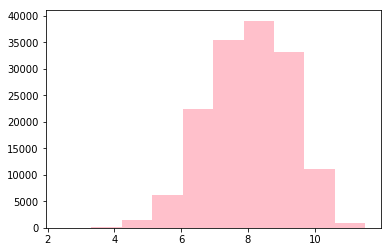

In [48]:
plt.hist(dfCar['price'],orientation='vertical',histtype='bar',color='pink')

In [ ]:
#价格上次已经做了np.log()归一化

In [49]:
#最后看下v_0到v_14
dfCar['v_0'].value_counts()

45.349115    20
48.087216    16
48.618150    15
47.840357    15
47.568450    15
             ..
43.774218     1
45.925620     1
43.507642     1
42.561630     1
44.408263     1
Name: v_0, Length: 143988, dtype: int64

(array([  137.,  1348.,  2093.,   931.,  5574., 37131., 58977., 37880.,
         5659.,   269.]),
 array([30.45197649, 32.63719667, 34.82241684, 37.00763702, 39.1928572 ,
        41.37807738, 43.56329755, 45.74851773, 47.93373791, 50.11895808,
        52.30417826]),
 <a list of 10 Patch objects>)

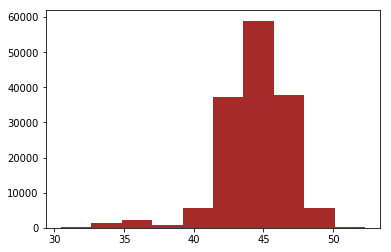

In [50]:
#看图较好可留的特征：0,3,4，8，11,12,13,14
plt.hist(dfCar['v_0'],orientation='vertical',histtype='bar',color='brown')

In [ ]:
#分布不好的展示如下

(array([55935., 28428.,    92.,   503.,  1978.,  4686., 16925., 31133.,
         9957.,   362.]),
 array([-4.2955889 , -3.13399918, -1.97240945, -0.81081972,  0.35077001,
         1.51235974,  2.67394946,  3.83553919,  4.99712892,  6.15871865,
         7.32030837]),
 <a list of 10 Patch objects>)

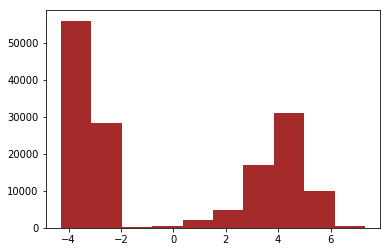

In [51]:
plt.hist(dfCar['v_1'],orientation='vertical',histtype='bar',color='brown')

(array([2.90400e+03, 1.09005e+05, 3.35830e+04, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.20000e+01, 3.51600e+03, 9.48000e+02]),
 array([-4.47067143, -2.12005464,  0.23056216,  2.58117895,  4.93179574,
         7.28241253,  9.63302933, 11.98364612, 14.33426291, 16.68487971,
        19.0354965 ]),
 <a list of 10 Patch objects>)

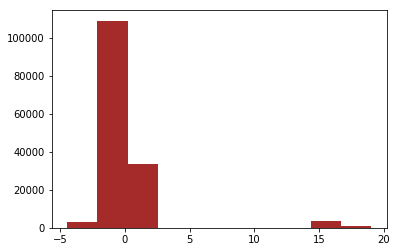

In [52]:
plt.hist(dfCar['v_2'],orientation='vertical',histtype='bar',color='brown')
#v2分布不均，不要

In [71]:
#plt.hist(dfCar['v_5'],orientation='vertical',histtype='bar',color='brown')
#分布不均，不要

In [70]:
#plt.hist(dfCar['v_6'],orientation='vertical',histtype='bar',color='brown')


In [69]:
#plt.hist(dfCar['v_7'],orientation='vertical',histtype='bar',color='brown')


In [68]:
#plt.hist(dfCar['v_9'],orientation='vertical',histtype='bar',color='brown')


In [67]:
#plt.hist(dfCar['v_10'],orientation='vertical',histtype='bar',color='brown')


In [66]:
#plt.hist(dfCar['v_11'],orientation='vertical',histtype='bar',color='brown')


In [59]:
#将几个数据值型数据归一化到0-1之间 np.log()
#v_0,3,4，8，12,13,14 
dfCar['v_0_new'] = dfCar['v_0'].apply(lambda x : np.log(x))
#dfCar['v_3_new'] = dfCar['v_3'].apply(lambda x : np.log(x))#有负数
#dfCar['v_4_new'] = dfCar['v_4'].apply(lambda x : np.log(x))#有负数
dfCar['v_8_new'] = dfCar['v_8'].apply(lambda x : x*10)#本来就很小,所以*10变到0-1之间
#dfCar['v_12_new'] = dfCar['v_12'].apply(lambda x : np.log(x))#有负数
#dfCar['v_13_new'] = dfCar['v_13'].apply(lambda x : np.log(x))#有负数
#dfCar['v_14_new'] = dfCar['v_14'].apply(lambda x : np.log(x))#有负数

In [72]:
#plt.hist(dfCar['v_14'],orientation='vertical',histtype='bar',color='pink')
#v_3有负数，np.log报错

(array([132870.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17129.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

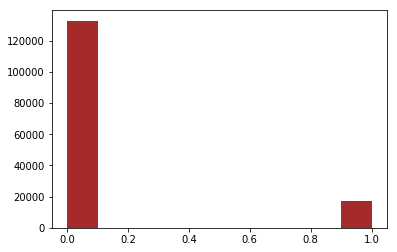

In [61]:
plt.hist(dfCar['notRepairedDamage'],orientation='vertical',histtype='bar',color='brown')
#正负例差太多，后面可考虑复制增加正例，
#gearbox也一样，差不多

In [ ]:
#seller,offerType已经删除，过于偏斜。测试数据做同样处理。
#plt.hist(dfCar['offerType'],orientation='vertical',histtype='bar',color='brown')

In [62]:
temp = dfCar["regDate_new"]
print(temp)

0        2004-01-01
1        2003-01-01
2        2004-01-01
3        1996-01-01
4        2012-01-01
            ...    
149994   2000-01-01
149995   2009-01-01
149996   2010-01-01
149997   2006-01-01
149998   1999-01-01
Name: regDate_new, Length: 149999, dtype: datetime64[ns]


In [63]:
#选特征
readyFeatureCols = ["SaleID","regDate_new","brand_new","bodayType_new","fuelType_new","gearbox","kilometer_new","notRepairedDamage","v_0_new","v_8_new","v_3","v_4","v_12","v_13","v_14","price"]
dfCarReady = pd.DataFrame(dfCar,columns = readyFeatureCols)
dfCarReady.head()

,SaleID,regDate_new,brand_new,bodayType_new,fuelType_new,gearbox,kilometer_new,notRepairedDamage,v_0_new,v_8_new,v_3,v_4,v_12,v_13,v_14,price
0,0,2004-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",NaN,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,2.525729,0.0,3.769487,0.228164,2.159744,1.143786,-2.420821,0.795292,0.914763,7.522941
1,1,2003-01-01,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,2.708050,0.0,3.813423,0.265974,1.380657,-1.422165,-1.030483,-1.722674,0.245522,8.188689
2,2,2004-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,2.525729,0.0,3.828171,0.621728,-0.998467,-0.996911,1.565330,-0.832687,-0.229963,8.735847
3,3,1996-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1.0,2.708050,0.0,3.821824,0.333945,0.883600,-2.228079,-0.501868,-2.438353,-0.478699,7.783224
4,4,2012-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",NaN,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,1.609438,0.0,3.792868,0.788194,-1.571239,2.246088,0.931110,2.834518,1.923482,8.556414


In [65]:
dfCarReady.to_csv("data//readyFeatures.csv")